# Ejercicio de programación Regresión Lineal

In [354]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [355]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/machine learning/datasets/USA Housing Dataset.csv')
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA


In [357]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')

X, y = df.iloc[:1000, 2].values, df.iloc[:1000, 1].values

m = y.size  # m = numero de ejemplos de entrenamiento

In [358]:
print(X)

[3. 4. 5. 3. 5. 3. 4. 4. 3. 4. 3. 4. 4. 3. 4. 2. 3. 1. 3. 3. 4. 2. 5. 3.
 4. 2. 4. 4. 4. 5. 3. 4. 3. 3. 4. 5. 3. 3. 3. 4. 3. 3. 4. 5. 3. 4. 4. 5.
 2. 3. 2. 4. 3. 4. 4. 3. 4. 3. 3. 3. 4. 2. 2. 3. 4. 5. 4. 2. 4. 3. 3. 3.
 4. 4. 4. 2. 4. 4. 2. 2. 3. 4. 4. 4. 4. 5. 3. 4. 5. 3. 3. 4. 2. 3. 3. 5.
 5. 3. 4. 3. 4. 4. 5. 3. 5. 3. 3. 6. 3. 3. 3. 4. 3. 3. 2. 7. 3. 5. 4. 3.
 4. 4. 3. 4. 3. 3. 2. 3. 2. 4. 4. 4. 3. 3. 3. 5. 3. 4. 3. 3. 3. 4. 5. 5.
 3. 3. 5. 3. 4. 4. 3. 5. 3. 3. 3. 3. 3. 4. 4. 3. 3. 4. 4. 4. 4. 3. 4. 3.
 3. 4. 4. 3. 5. 2. 5. 3. 3. 4. 2. 3. 3. 3. 3. 5. 2. 3. 2. 3. 3. 3. 3. 3.
 3. 4. 4. 3. 3. 3. 3. 3. 4. 2. 4. 3. 4. 3. 3. 3. 3. 2. 3. 3. 3. 4. 4. 4.
 3. 5. 3. 2. 3. 4. 3. 5. 2. 4. 4. 5. 3. 2. 3. 4. 4. 3. 4. 4. 4. 4. 4. 3.
 5. 2. 3. 3. 4. 3. 4. 3. 4. 3. 3. 4. 3. 4. 2. 3. 4. 4. 3. 3. 4. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 4. 2. 5. 5. 4. 4. 4. 4. 4. 7. 3. 4. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 2. 3. 4. 3. 4. 3. 3. 3. 4. 3. 4. 3. 3. 4. 3. 3. 3.
 5. 4. 4. 3. 4. 3. 3. 3. 4. 5. 2. 3. 1. 3. 3. 3. 3.

In [359]:
print(y)

[ 376000.  800000. 2238888.  324000.  549900.  320000.  875000.  265000.
  394950.  842500.  368000. 1225000.  885000.  453246.  927000.  490000.
  341000.  235000. 1200000.  560000.  900000.  255000. 1575000.  876650.
  540000.  350000.  750000.  582000. 1315000.  372500.  410000.  360000.
 1015000.  225000.  647000.  950000.  185000.  335000.  210000.  522000.
  770000.  499950.  751000.  330000.  465000.  850000.  947500.  302000.
  500000.  201000.  265000.  870300.  339000.  690000.  788000.  315275.
  505000.  368000.  947500.  156000.  610000.  420000.  192000.  910000.
 1300000. 1346400.  840000.  300000.  505000.  110000.  746000.  211000.
  675000.  734200. 1225000.  615000.  630000. 1264000.  301500.  369000.
  635000. 1033888.  383000. 1050000.  455000.  819900.  625000.  651000.
  480000.  757000.  460000.  267345.  530000.  449500.  289000.  373000.
  525000.  777000.  550000.  523000.  628000.  581000.  245000.  415000.
 1895000.  225000.  287000.  799200.  239950.  5910

In [360]:
print(X.size)

1000


### 1.1 Trazar los datos

In [361]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio de Casa en $1,000,000')
    pyplot.xlabel('Número de Habitaciones')


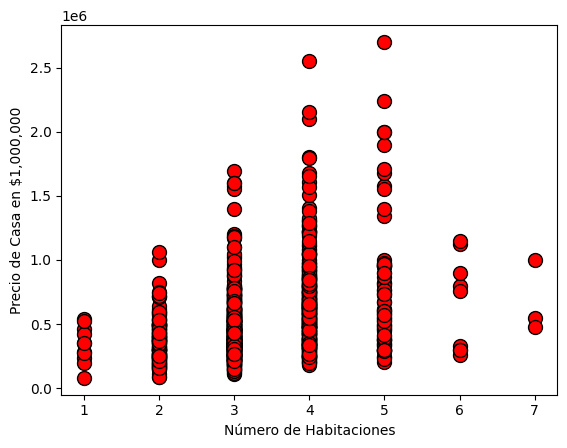

In [362]:
plotData(X, y)

In [363]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [364]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [365]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [366]:
J = computeCost(X, y, theta=np.array([0, 0]))

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([1, 2]))

<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [367]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [368]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 500
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))

Theta encontrada por descenso gradiente: 42904.6828, 146434.6985


Se utilizan los parametros finales para grafical la linea.

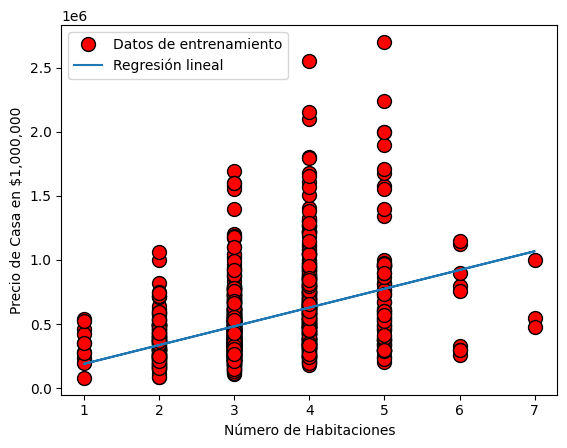

In [369]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])
pyplot.show()

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [370]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3], theta)
print('Para una casa con 3 habitaciones, se predice un precio {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 6], theta)
print('Para una casa con 6 habitaciones, se predice un precio {:.2f}\n'.format(predict2))

Para una casa con 3 habitaciones, se predice un precio 482208.78

Para una casa con 6 habitaciones, se predice un precio 921512.87



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

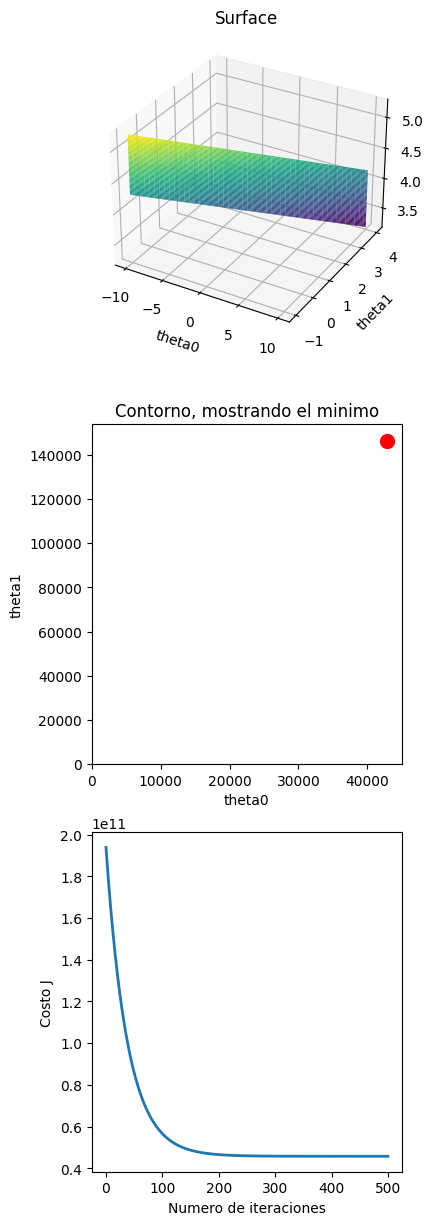

In [371]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass